# IRIS FLOWER CLASSIFICATION

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. 

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load the dataset
data = pd.read_csv('IRIS.csv')

# Display the first few rows of the dataset
print(data.head())



   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [13]:
# Check for missing values
print(data.isnull().sum())




sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [14]:
# Explore the dataset
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [15]:
# Encode the 'species' column using Label Encoding
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

# Separate features and target variable
X = data.drop('species', axis=1)
y = data['species']


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


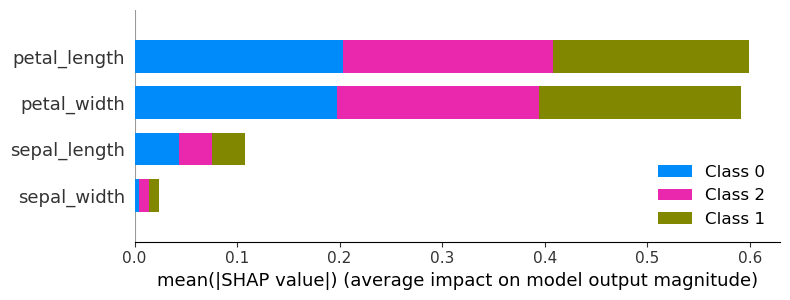

In [17]:
# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)


# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Get SHAP values for a set of samples (X_test)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [18]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [10]:
# Example of new data
new_data = np.array([[5.9,3,5.1,1.8]])

# Make predictions using the trained model
new_prediction = model.predict(new_data)

# Decode the predicted label if you used Label Encoding
predicted_species = label_encoder.inverse_transform(new_prediction)

print(f'Predicted Species: {predicted_species[0]}')


Predicted Species: Iris-virginica
